# Linear Regression on Wine Quality Dataset

Predict wine quality based on chemical features.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 1) Load data and show basic info
df = pd.read_csv("winequalityN.csv")
print("Raw data shape:", df.shape)
print(df.head())



Raw data shape: (6497, 13)
    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49     

In [9]:
# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


In [10]:
# 2) Clean data: remove duplicates and rows with missing values
df = df.drop_duplicates().dropna()
print("\nCleaned data shape:", df.shape)
print(df.head())




Cleaned data shape: (5295, 13)
    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
6  white            6.2              0.32         0.16             7.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
6      0.045                 30.0                 136.0   0.9949  3.18   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49

In [11]:
# 3) Separate features and target
X = df.drop(columns=['quality'])
y = df['quality']

# 4) Convert text columns (if any) to numeric using one-hot encoding
cat_cols = X.select_dtypes(include=['object', 'category']).columns
if len(cat_cols) > 0:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
    print("\nAfter encoding, feature columns:", list(X.columns))




After encoding, feature columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type_white']


In [12]:
# 5) Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6) Scale features (important when features have different ranges)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7) Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 8) Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMSE: {mse:.4f}   R²: {r2:.4f}")




MSE: 0.6183   R²: 0.2941


In [13]:
# 9) Show a small table of Actual vs Predicted with error
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
results['Error'] = results['Actual'] - results['Predicted']
print("\nActual vs Predicted (first 10 rows):")
print(results.head(10).reset_index(drop=True))




Actual vs Predicted (first 10 rows):
   Actual  Predicted     Error
0       5   5.389395 -0.389395
1       6   6.569608 -0.569608
2       6   6.288210 -0.288210
3       6   6.013426 -0.013426
4       5   5.462432 -0.462432
5       5   5.479133 -0.479133
6       6   5.390546  0.609454
7       6   5.334652  0.665348
8       7   6.296524  0.703476
9       5   4.891272  0.108728


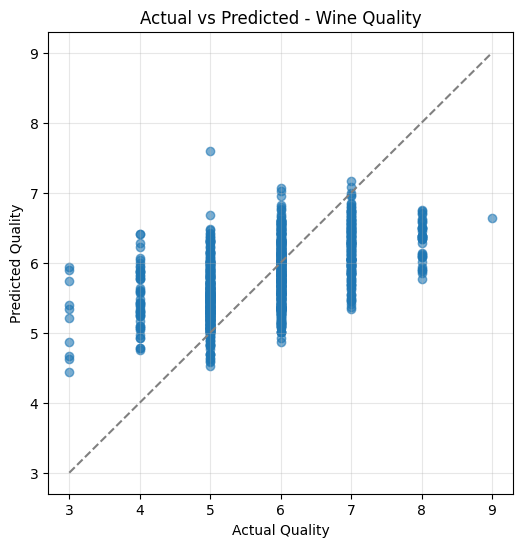

In [14]:
# 10) Quick scatter plot (visual check)
plt.figure(figsize=(6,6))
plt.scatter(results['Actual'], results['Predicted'], alpha=0.6)
minv, maxv = min(results['Actual'].min(), results['Predicted'].min()), max(results['Actual'].max(), results['Predicted'].max())
plt.plot([minv, maxv], [minv, maxv], '--', color='gray')  # perfect prediction line
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted - Wine Quality")
plt.grid(alpha=0.3)
plt.show()